<a href="https://colab.research.google.com/github/kobeisfree94/Projects/blob/master/CP1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
from  matplotlib import pyplot as plt
import cv2 
from google.colab.patches import cv2_imshow 
from PIL import Image
import matplotlib.image as mpimg
%matplotlib inline 
import os
import shutil
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import img_to_array
from keras.layers import Dense
from keras import Model
from keras import optimizers
import random
from sklearn.utils import class_weight


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
root_dir = '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/Pos_Samples/'
classes = ['Pos']

for cls in classes:
    os.makedirs(root_dir + 'train/' + cls)
    os.makedirs(root_dir + 'test/' + cls)
    


for cls in classes:
    src = root_dir + cls 
    print(src)

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)

   
    train_FileNames,test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)*0.8)])

  
    train_FileNames = [src+'/'+ name for name in train_FileNames]
    test_FileNames = [src+'/' + name for name in test_FileNames]

    print('Total images  : '+ cls + ' ' +str(len(allFileNames)))
    print('Train : '+ cls + ' '+str(len(train_FileNames)))
    print('Testing : '+ cls + ' '+str(len(test_FileNames)))
    

    for name in train_FileNames:
        shutil.copy(name, root_dir +'train/'+cls )


    for name in test_FileNames:
        shutil.copy(name,root_dir +'test/'+cls )


/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/Pos_Samples/Pos
Total images  : Pos 58
Train : Pos 46
Testing : Pos 12


In [5]:
root_dir = '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/Neg_Samples/'
classes = ['Neg']

for cls in classes:
    os.makedirs(root_dir + 'train/' + cls)
    os.makedirs(root_dir  + 'test/' + cls)
    


for cls in classes:
    src = root_dir + cls 
    print(src)

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)

   
    train_FileNames,test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)*0.8)])


    train_FileNames = [src+'/'+ name for name in train_FileNames]
    test_FileNames = [src+'/' + name for name in test_FileNames]

    print('Total images  : '+ cls + ' ' +str(len(allFileNames)))
    print('Train : '+ cls + ' '+str(len(train_FileNames)))
    print('Test : '+ cls + ' '+str(len(test_FileNames)))
    
    

    for name in train_FileNames:
        shutil.copy(name, root_dir +'train/'+cls )

    for name in test_FileNames:
        shutil.copy(name,root_dir +'test/'+cls )

/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/Neg_Samples/Neg
Total images  : Neg 1342
Train : Neg 1073
Test : Neg 269


In [23]:
pos_train = '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/Pos_Samples/train/Pos'
pos_test = '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/Pos_Samples/test/Pos'
neg_train = '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/Neg_Samples/train/Neg'
neg_test = '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/Neg_Samples/test/Neg'


In [29]:
def mergefolders(root_src_dir, root_dst_dir):
    for src_dir, dirs, files in os.walk(root_src_dir):
        dst_dir = root_dst_dir
        if not os.path.exists(dst_dir):
            os.makedirs(dst_dir)
        for file_ in files:
            src_file = os.path.join(src_dir, file_)
            dst_file = os.path.join(dst_dir, file_)
            if os.path.exists(dst_file):
                os.remove(dst_file)
            shutil.copy(src_file, dst_dir)
    return dst_dir
   

In [34]:
train_folder = mergefolders(pos_train, '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/train/Pos')
train_folder = mergefolders(neg_train, '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/train/Neg')
test_folder = mergefolders(pos_test, '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/test/Pos')
test_folder = mergefolders(neg_test, '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/test/Neg')

In [32]:
def create_dataset(directory):
  data = image_dataset_from_directory(
      directory= directory,
      labels = 'inferred',
      label_mode = 'categorical',
      batch_size = 32,
      image_size = (224,224),
  )
  return data


In [37]:
train= '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/train/'
test = '/content/gdrive/MyDrive/Colab Notebooks/COVID/COVID/test/'

In [38]:
train = create_dataset(train)
test = create_dataset(test)

Found 1119 files belonging to 2 classes.
Found 281 files belonging to 2 classes.


In [76]:
batch_size = 256
epochs = 5
verbose = 1
class_weights = {0: 1400/(2*100),
                 1: 1400/(2*1300)                 
                }

In [77]:
ResNet50 = tf.keras.applications.ResNet50(
    include_top = True,
    weights = None, #test it out
    input_tensor = None,
    input_shape = None,
    pooling = None,
    classes = 2
)

In [78]:
ResNet50.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [79]:
ResNet50.summary()
result = ResNet50.fit(train, batch_size = batch_size, epochs = epochs, verbose = verbose, shuffle = True, class_weight = class_weights)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

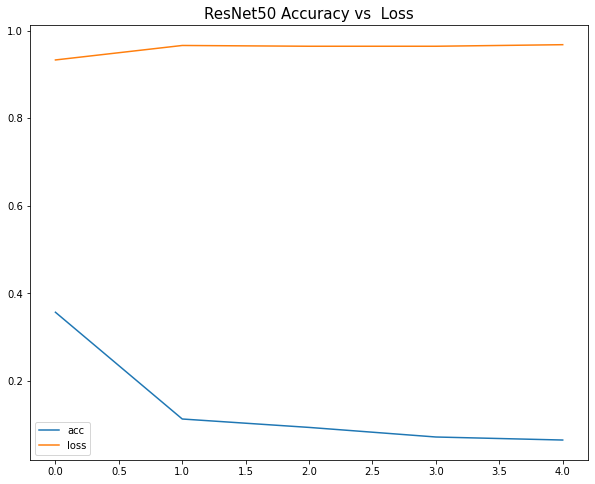

In [80]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(result.history['loss'])
plt.plot(result.history['acc'])
plt.legend(['acc','loss'])
plt.title("ResNet50 Accuracy vs  Loss", fontsize=15)
plt.show()

In [81]:
#class imbalance
#undersample majority
#oversample minority
#adjusting the weight - class_weights

In [82]:
ResNet101 = tf.keras.applications.ResNet101(
    include_top = True,
    weights = None, #test it out
    input_tensor = None,
    input_shape = None,
    pooling = None,
    classes = 2
)

In [83]:
ResNet101.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [84]:
ResNet101.summary()
result = ResNet101.fit(train, batch_size = batch_size, epochs = epochs, verbose = verbose, shuffle = True, class_weight = class_weights)

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

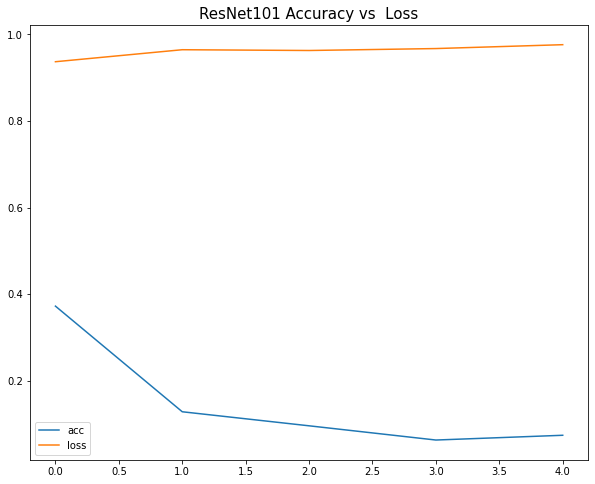

In [85]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(result.history['loss'])
plt.plot(result.history['acc'])
plt.legend(['acc','loss'])
plt.title("ResNet101 Accuracy vs  Loss", fontsize=15)
plt.show()

In [86]:
ResNet152 = tf.keras.applications.ResNet152(
    include_top = True,
    weights = None, #test it out
    input_tensor = None,
    input_shape = None,
    pooling = None,
    classes = 2
)

In [87]:
ResNet152.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [88]:
ResNet152.summary()
result = ResNet152.fit(train, batch_size = batch_size, epochs = epochs, verbose = verbose, shuffle = True, class_weight = class_weights)

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

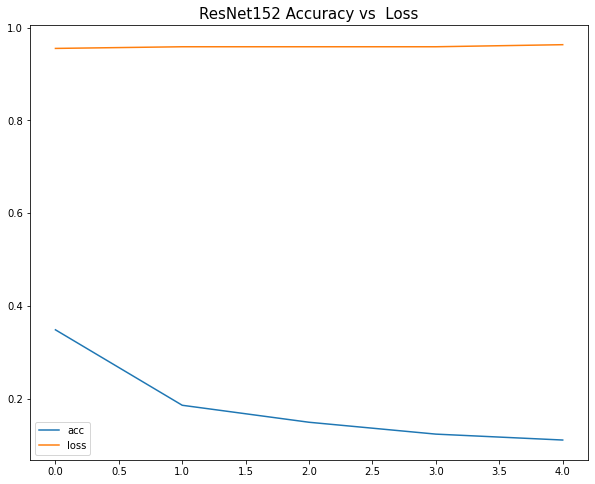

In [89]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(result.history['loss'])
plt.plot(result.history['acc'])
plt.legend(['acc','loss'])
plt.title("ResNet152 Accuracy vs  Loss", fontsize=15)
plt.show()

In [90]:
ResNet50V2 = tf.keras.applications.ResNet50V2(
    include_top = True,
    weights = None, #test it out
    input_tensor = None,
    input_shape = None,
    pooling = None,
    classes = 2
)

In [91]:
ResNet50V2.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [92]:
ResNet50V2.summary()
result = ResNet50V2.fit(train, batch_size = batch_size, epochs = epochs, verbose = verbose, shuffle = True, class_weight = class_weights)

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

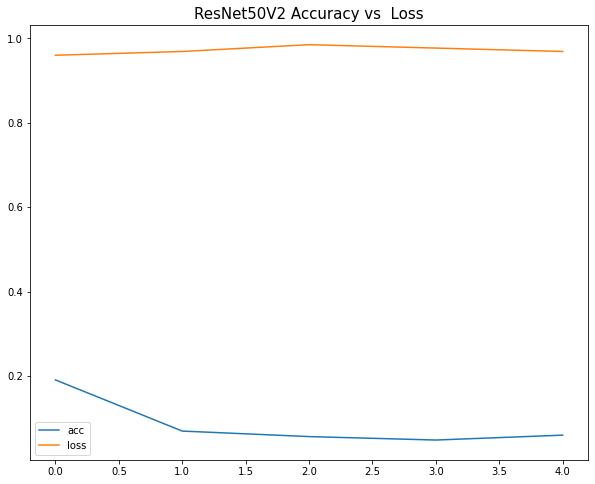

In [93]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(result.history['loss'])
plt.plot(result.history['acc'])
plt.legend(['acc','loss'])
plt.title("ResNet50V2 Accuracy vs  Loss", fontsize=15)
plt.show()

In [94]:
ResNet101V2 = tf.keras.applications.ResNet101V2(
    include_top = True,
    weights = None, #test it out
    input_tensor = None,
    input_shape = None,
    pooling = None,
    classes = 2
)

In [95]:
ResNet101V2.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [96]:
ResNet101V2.summary()
result = ResNet101V2.fit(train, batch_size = batch_size, epochs = epochs, verbose = verbose, shuffle = True, class_weight = class_weights)

Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

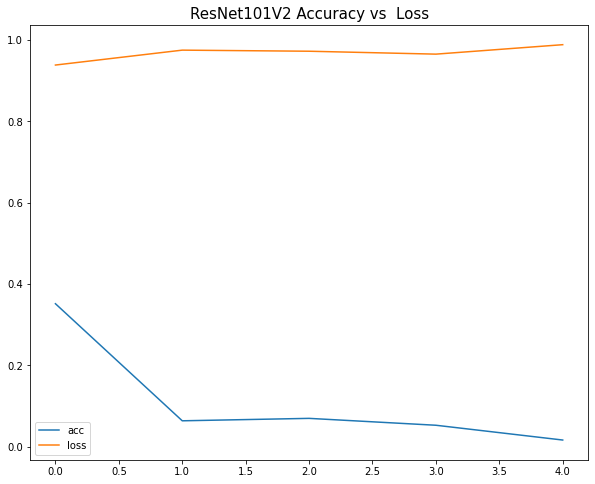

In [97]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(result.history['loss'])
plt.plot(result.history['acc'])
plt.legend(['acc','loss'])
plt.title("ResNet101V2 Accuracy vs  Loss", fontsize=15)
plt.show()

In [56]:
ResNet152V2 = tf.keras.applications.ResNet152V2(
    include_top = True,
    weights = None, #test it out
    input_tensor = None,
    input_shape = None,
    pooling = None,
    classes = 2
)

In [57]:
ResNet152V2.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [74]:
ResNet152V2.summary()
result = ResNet152V2.fit(train, batch_size = batch_size, epochs = epochs, verbose = verbose, shuffle = True, class_weight = class_weights)

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

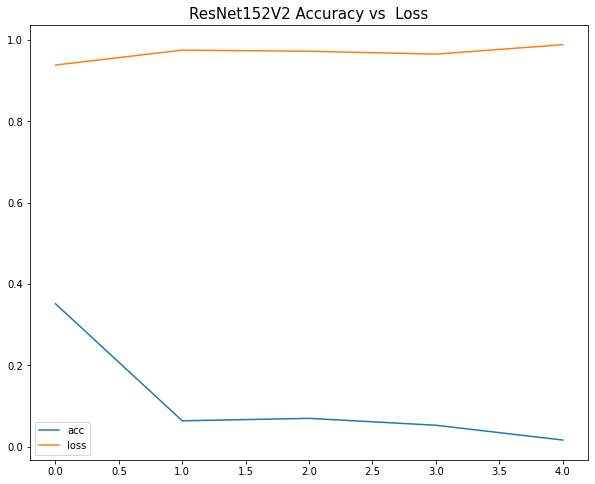

In [101]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(result.history['loss'])
plt.plot(result.history['acc'])
plt.legend(['acc','loss'])
plt.title("ResNet152V2 Accuracy vs  Loss", fontsize=15)
plt.show()

In [98]:
results = {'Name' : ['ResNet50', 'ResNet101', 'ResNet152', 'ResNet50V2', 'ResNet101V2', 'ResNet152V2'],
'Acc' : [.9678, .9759, .9634, .9687, .9884, .9723],
'Loss' : [.0652, .0744, .1107, .0599, .0164, .0704]}

In [100]:
df = pd.DataFrame(results)
df

,Name,Acc,Loss
0,ResNet50,0.9678,0.0652
1,ResNet101,0.9759,0.0744
2,ResNet152,0.9634,0.1107
3,ResNet50V2,0.9687,0.0599
4,ResNet101V2,0.9884,0.0164
5,ResNet152V2,0.9723,0.0704
